In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from numba import njit
import numba

In [8]:
@njit
def cholesky_numba(A):
    n = A.shape[0]
    L = np.zeros_like(A)
    for i in range(n):
        for j in range(i+1):
            s = 0
            for k in range(j):
                s += L[i][k] * L[j][k]

            if (i == j):
                L[i][j] = (A[i][i] - s) ** 0.5
            else:
                L[i][j] = (1.0 / L[j][j] * (A[i][j] - s))
    return L

@njit
def multivariate_normal_numba(mean, covariance):
    L = cholesky_numba(covariance)
    X = np.array([np.random.normal(), np.random.normal()])
    return L.dot(X) + mean

In [10]:
mean = np.array([1.4, 3.])
covariance = np.array([[1.,-0.7],[-0.7,1.5]])

n = 100000
results = np.zeros((n, 2))
for i in range(n):
    results[i,:] = multivariate_normal_numba(mean, covariance)
    
print(np.mean(results, axis=0))
print(np.cov(results[:,0], results[:,1]))

[1.3941118  3.00142595]
[[ 0.99668774 -0.69431975]
 [-0.69431975  1.49638475]]


In [4]:
a=["asdf", "fdsa"]
"_".join(a)

'asdf_fdsa'

In [3]:
@njit
def test2():
    return np.random.normal(size=2)

In [6]:
@njit
def test():
    a = np.array([0., 0.])
    b = np.array([[1.,0.5],[0.5,1.]])
    L = cholesky_numba(b)
    x = np.array([np.random.normal(), np.random.normal()])
    print(L, x)
    Y = np.dot(L,x)
    return Y

In [7]:
test()

[[1.        0.       ]
 [0.5       0.8660254]] [-0.79780748 -0.28013594]


array([-0.79780748, -0.64150859])

In [8]:
normal_dist = lambda x, m, s: 1 / (np.sqrt(2*np.pi) * s) * np.exp(-1/2 * ((x - m) / s)**2)

@njit
def b_maxL_2(m, t, C):
    first = C[0]+C[1]-(m[0]+m[1])*(t[0]+t[1])
    root = (C[0]+C[1]+(m[0]-m[1])*(t[0]+t[1]))**2-4*C[0]*(m[0]-m[1])*(t[0]+t[1])
    res = (first+np.sqrt(root))/(2*(t[0]+t[1]))
    if res < 0:
        return 0
    return res

In [9]:
@njit
def interpolate_constant(x1, x2, y1, y2, x):
    return (y1 + y2) / 2 + 0*x

@njit
def interpolate_linear(x1, x2, y1, y2, x):
    return y1 + (y2 - y1) * (x - x1) / (x2 - x1)

# @njit
# def interpolate_quadratic(ys, xs, x):
#     idx = np.searchsorted(xs, x, side="left")
#     print(idx)
#     if idx == 0:
#         return ys[0]
#     elif idx == len(xs):
#         return ys[-1]
    
#     def solve_quad_coef(xs, ys):
#         A = xs[:,np.newaxis] ** np.linspace(2, 0, 3)[np.newaxis,:]
#         coef = np.linalg.solve(A,ys)
#         return coef
    
#     left_quad = True if idx > 1 else False
#     right_quad = True if idx < len(xs)-1 else False
#     res = 0.
#     if left_quad:
#         quad_xs = np.array([idx-2, idx-1, idx])
#         coef = solve_quad_coef(xs[quad_xs], ys[quad_xs])
#         res += coef[0]*x**2 + coef[1]*x + coef[2]
#     if right_quad:
#         quad_xs = np.array([idx-1, idx, idx+1])
#         coef = solve_quad_coef(xs[quad_xs], ys[quad_xs])
#         res += coef[0]*x**2 + coef[1]*x + coef[2]
#     if left_quad and right_quad:
#         res /= 2
#     return res

# @njit
# def interpolate_quadratic_logarithmically(ys, xs, x):
#     log_xs = np.linspace(1, len(xs), len(xs))
#     idx = np.searchsorted(xs, x, side="left")
#     log_x = np.log(x / xs[idx-1]) / np.log(xs[idx] / xs[idx-1]) + log_xs[idx-1]
#     print(log_xs, log_x)
#     return interpolate_quadratic(ys, log_xs, log_x)

@njit
def interpolate_exponential(x1, x2, y1, y2, x):
    B = np.log(y2 / y1) / (x2 - x1)
    A = y1 * np.exp(-B*x1)
    return A*np.exp(B*x)

@njit
def interpolate_logarithmic(x1, x2, y1, y2, x):
    A = (y2 - y1) / np.log(x2 / x1)
    B = y1 - A * np.log(x1)
    return A * np.log(x) + B

@njit
def interpolate_powerlaw(x1, x2, y1, y2, x):
    B = np.log(y2 / y1) / np.log(x2 / x1)
    A = y1 * x1**(-B)
    return A * x**B

@njit
def interpolate_hyperbolic(x1, x2, y1, y2, x):
    A = (y2 - y1) / (1/x2 - 1/x1)
    B = y1 - A / x1
    return A / x + B

@njit
def interpolate_root(x1, x2, y1, y2, x):
    B = (x2 - (y2/y1)**2 * x1) / ((y2/y1)**2 -1)
    A = y1 / np.sqrt(x1 + B)
    return A * np.sqrt(x + B)


In [10]:
x1 = 1
x2 = 2
y1 = 2
y2 = 3
x = 1.1
print(interpolate_root(x1, x2, y1, y2, x))

2.121320343559643


In [92]:
p1 = np.linspace(1,5,3)
p2 = np.linspace(0,8,3)
p3 = np.linspace(12,24,3)
p4 = np.linspace(0,1,2)
p5 = np.linspace(0,4,5)
p6 = np.linspace(0,1,2)
matrix = (p1[:,np.newaxis,np.newaxis,np.newaxis,np.newaxis,np.newaxis]
          + p2[np.newaxis,:,np.newaxis,np.newaxis,np.newaxis,np.newaxis]
          + p3[np.newaxis,np.newaxis,:,np.newaxis,np.newaxis,np.newaxis]
          + p4[np.newaxis,np.newaxis,np.newaxis,:,np.newaxis,np.newaxis]
          + p5[np.newaxis,np.newaxis,np.newaxis,np.newaxis,:,np.newaxis]
          + p6[np.newaxis,np.newaxis,np.newaxis,np.newaxis,np.newaxis,:])

def f(x1, x2, x3, x4):
    return 13 + x1 + 2*x2 + 3*x3 + x4

axis1 = np.linspace(1,3,3)
axis2 = np.linspace(1,3,3)
axis3 = np.linspace(1,3,3)
axis4 = np.linspace(1,2,2)
axis5 = np.linspace(1,4,4)

dimension_order = (1,0,2)
dimension_values = (axis1, axis2, axis3, axis4, axis5)
interpolation_functions = (interpolate_linear, interpolate_logarithmic, interpolate_powerlaw, interpolate_linear, interpolate_linear)
print(matrix)

[[[[[[13. 14.]
     [14. 15.]
     [15. 16.]
     [16. 17.]
     [17. 18.]]

    [[14. 15.]
     [15. 16.]
     [16. 17.]
     [17. 18.]
     [18. 19.]]]


   [[[19. 20.]
     [20. 21.]
     [21. 22.]
     [22. 23.]
     [23. 24.]]

    [[20. 21.]
     [21. 22.]
     [22. 23.]
     [23. 24.]
     [24. 25.]]]


   [[[25. 26.]
     [26. 27.]
     [27. 28.]
     [28. 29.]
     [29. 30.]]

    [[26. 27.]
     [27. 28.]
     [28. 29.]
     [29. 30.]
     [30. 31.]]]]



  [[[[17. 18.]
     [18. 19.]
     [19. 20.]
     [20. 21.]
     [21. 22.]]

    [[18. 19.]
     [19. 20.]
     [20. 21.]
     [21. 22.]
     [22. 23.]]]


   [[[23. 24.]
     [24. 25.]
     [25. 26.]
     [26. 27.]
     [27. 28.]]

    [[24. 25.]
     [25. 26.]
     [26. 27.]
     [27. 28.]
     [28. 29.]]]


   [[[29. 30.]
     [30. 31.]
     [31. 32.]
     [32. 33.]
     [33. 34.]]

    [[30. 31.]
     [31. 32.]
     [32. 33.]
     [33. 34.]
     [34. 35.]]]]



  [[[[21. 22.]
     [22. 23.]
     [23. 24.]
     [24. 25.]


In [93]:
@njit
def interpolate_matrix_5_dim(position, matrix, dimension_values, interpolation_functions):
    # this is a really ugly implementation, but I couldn't figure out a better way using numba
    
    indices = np.zeros(len(position), dtype=np.int32)
    for i in range(len(position)):
        indices[i] = np.searchsorted(dimension_values[i], position[i], side="left")
        
    surrounding_matrix = matrix[
        indices[0]-1 : indices[0]+1,
        indices[1]-1 : indices[1]+1,
        indices[2]-1 : indices[2]+1,
        indices[3]-1 : indices[3]+1,
        indices[4]-1 : indices[4]+1,
    ]
    
    interpolation1 = interpolation_functions[0](
        dimension_values[0][indices[0]-1],
        dimension_values[0][indices[0]],
        surrounding_matrix[0],
        surrounding_matrix[1],
        position[0]
    )
    
    interpolation2 = interpolation_functions[1](
        dimension_values[1][indices[1]-1],
        dimension_values[1][indices[1]],
        interpolation1[0],
        interpolation1[1],
        position[1]
    )
    
    interpolation3 = interpolation_functions[2](
        dimension_values[2][indices[2]-1],
        dimension_values[2][indices[2]],
        interpolation2[0],
        interpolation2[1],
        position[2]
    )
    
    interpolation4 = interpolation_functions[3](
        dimension_values[3][indices[3]-1],
        dimension_values[3][indices[3]],
        interpolation3[0],
        interpolation3[1],
        position[3]
    )
    
    interpolation5 = interpolation_functions[4](
        dimension_values[4][indices[4]-1],
        dimension_values[4][indices[4]],
        interpolation4[0],
        interpolation4[1],
        position[4]
    )
        
    return interpolation5

In [69]:
a = (2,2,2,2,2)
b = np.zeros(a[5:])
b

array(0.)

In [98]:
interpolate_matrix_5_dim(
    np.array([2.0,2.0,2.0,2.0,2.0]),
    matrix,
    dimension_values,
    interpolation_functions
)

array([27., 28.])

In [4]:
# # @njit
# # def array2tuple_len3(array):
# #     return (array[0], array[1], array[2])

# # @njit
# def interpolate_matrix(position, matrix, dimension_order, dimension_values, interpolation_functions, counter=0):
#     # print(position, counter)
#     if counter == len(position):
#         new_pos = tuple(np.array(position.astype(np.int32)))
#         # new_pos = np.split(position.astype(np.int32), len(position))
#         # new_pos = array2tuple_len3(position.astype(np.int32))
#         # print(new_pos)
#         # print(matrix[new_pos])
#         # print()
#         return matrix[new_pos]
#     else:
#         id = np.searchsorted(dimension_values[dimension_order[counter]], position[dimension_order[counter]], side="left")
#         # print(id)
        
#         new_pos1 = position.copy()
#         new_pos1[dimension_order[counter]] = np.float64(id-1)
#         val1 = interpolate_matrix(
#             new_pos1,
#             matrix,
#             dimension_order,
#             dimension_values,
#             interpolation_functions,
#             counter+1
#         )
        
#         new_pos2 = position.copy()
#         new_pos2[dimension_order[counter]] = np.float64(id)
#         val2 = interpolate_matrix(
#             new_pos2,
#             matrix,
#             dimension_order,
#             dimension_values,
#             interpolation_functions,
#             counter+1
#         )
        
#         # if interpolation_functions[dimension_order[counter]] == "constant":
#         #     interpolation_function = interpolate_constant
#         # elif interpolation_functions[dimension_order[counter]] == "linear":
#         #     interpolation_function = interpolate_linear
#         # elif interpolation_functions[dimension_order[counter]] == "exponential":
#         #     interpolation_function = interpolate_exponential
#         # elif interpolation_functions[dimension_order[counter]] == "powerlaw":
#         #     interpolation_function = interpolate_powerlaw
        
#         return interpolation_functions[dimension_order[counter]](
#             dimension_values[dimension_order[counter]][id-1],
#             dimension_values[dimension_order[counter]][id],
#             val1,
#             val2,
#             position[dimension_order[counter]]
#         )

In [39]:
interpolate_matrix(
    np.array([2.5,2.0,1.0]),
    matrix,
    dimension_order,
    dimension_values,
    interpolation_functions
)

array([20., 21.])

In [64]:
t = np.array([1,1,1])
np.split(t,3)

[array([1]), array([1]), array([1])]

In [73]:
matrix[tuple(np.array([0,0,0]))]

13.0

In [145]:
# true incoming rates
s1 = 200.
s2 = 100.
b = 300.

# include time, even though rates = counts here, only included so that b_max_L doesn't have to be rewritten
t1 = 1.
t2 = 1.

true_counts = np.array([s1, s2, b, b])
cluster_size = 2

# How many posterior samples
num_posterior_samples = 300
# How many predictive samples, equivalent to number of real data bins in real analysis
num_predictive_samples = 1000
# Bins in plot
num_bins = 100

# standard deviation of posterior
posterior_std = np.array([0., 0.])
# samples of posterior
posterior_samples = np.random.normal(true_counts[:cluster_size], posterior_std, size=(num_posterior_samples, cluster_size))

# Each posterior sample is sampled into the predictive samples
posterior_predictive_source_counts = np.random.poisson(posterior_samples, (num_predictive_samples, num_posterior_samples, cluster_size))
# posterior_predictive_source_counts = posterior_predictive_source_counts.swapaxes(0, 1)
# posterior_predictive_source_counts = posterior_predictive_source_counts.swapaxes(1, 2)

# actual measured counts, available to use in analysis
measured_counts = np.random.poisson(true_counts, (num_predictive_samples, len(true_counts)))
measured_counts_combined = measured_counts[:,:cluster_size] + measured_counts[:,cluster_size:]

# maximum likelihood background
b_max_L = np.zeros((num_predictive_samples, num_posterior_samples))
for i in range(num_posterior_samples):
    for j in range(num_predictive_samples):
        b_max_L[j, i] = b_maxL_2(posterior_samples[i], [t1, t2], measured_counts_combined[j])
# n, bins, _ = plt.hist(b_max_L.flatten(), bins=num_bins)
# x = bins
# y = normal_dist(bins, b, np.sqrt(b))
# y = y * np.amax(n) / np.amax(y)
# plt.plot(x, y)


In [146]:
# Repeat for easier usage
posterior_predictive_background_counts = np.repeat(b_max_L[:,:,np.newaxis], 2, axis=2)
# Sample posterior predictive counts
posterior_predictive_counts = np.random.poisson(posterior_predictive_background_counts + posterior_predictive_source_counts)

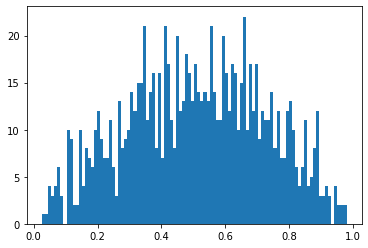

In [147]:
# Sort posterior predictive counts for each predictive sample, i.e. sort posterior samples
argsort = np.argsort(posterior_predictive_counts, axis=1)
total = np.take_along_axis(posterior_predictive_counts, argsort, axis=1)

# Find placement of measured counts in sorted array
cdf = np.zeros(num_predictive_samples)
for i in range(num_predictive_samples):
    cdf[i] = ((np.searchsorted(total[i,:,0], measured_counts_combined[i, 0], "left")
                     + np.searchsorted(total[i,:,0], measured_counts_combined[i, 0], "right"))
                     / (2 * num_posterior_samples))
    
_ = plt.hist(cdf, bins=num_bins)


In [19]:
np.insert(np.geomspace(1,100,3), 0, 0.)

array([  0.,   1.,  10., 100.])

In [5]:
@njit
def calc_bmaxL_variance_matrix(b_array, s1_array, t1_array, s2_array, t2_array, num_samples=1000000):
    variance_matrix = np.zeros((len(b_array), len(s1_array), len(t1_array), len(s2_array), len(t2_array), 2, 2, 2))
    for b_i, b in enumerate(b_array):
        for s1_i, s1 in enumerate(s1_array):
            for t1_i, t1 in enumerate(t1_array):
                for s2_i, s2 in enumerate(s2_array):
                    for t2_i, t2 in enumerate(t2_array):
                        print(b_i, s1_i, t1_i, s2_i, t2_i)
                        bd1 = np.zeros(num_samples)
                        bd2 = np.zeros(num_samples)
                        sd1 = np.zeros(num_samples)
                        sd2 = np.zeros(num_samples)
                        for n_i in range(num_samples):
                            s1m = np.random.poisson(t1 * s1)
                            s2m = np.random.poisson(t2 * s2)
                            b1m = np.random.poisson(t1 * b)
                            b2m = np.random.poisson(t2 * b)
                            
                            c1m = s1m + b1m
                            c2m = s2m + b2m
                            b_max_L = b_maxL_2(np.array([s1, s2]), np.array([t1, t2]), np.array([c1m, c2m]))
                            
                            bd1[n_i] = b1m - b_max_L*t1
                            bd2[n_i] = b2m - b_max_L*t2
                            sd1[n_i] = s1m - s1*t1
                            sd2[n_i] = s2m - s2*t2
                            
                        # if b_i == 0 and s1_i == 0 and s2_i == 0:
                        #     print(b, s1, t1, s2, t2)
                        #     print(s1m, s2m, b1m, b2m)
                        #     print([s1, s2], [t1, t2], [c1m, c2m])
                        #     print(b_maxL_2([s1, s2], [t1, t2], [c1m, c2m]))
                        #     print(b1m - b_max_L*t1, b2m - b_max_L*t2)
                        #     print(s1m - s1*t1, s2m - s2*t2)
                        #     print(np.cov(bd1, sd1))
                        variance_matrix[b_i, s1_i, t1_i, s2_i, t2_i, 0, :, :] = np.cov(bd1, sd1)
                        variance_matrix[b_i, s1_i, t1_i, s2_i, t2_i, 1, :, :] = np.cov(bd2, sd2)
                        
    return variance_matrix

In [6]:
input_b = np.geomspace(0.1,100,4)
input_s1 = np.geomspace(0.01,10,5)
input_t1 = np.geomspace(600, 6000,5)
input_s2 = np.geomspace(0.01,10,3)
input_t2 = np.geomspace(600, 6000,3)
print(input_b)
print(input_s1)
print(input_t1)
print(input_s2)
print(input_t2)

[  0.1   1.   10.  100. ]
[ 0.01        0.05623413  0.31622777  1.77827941 10.        ]
[ 600.         1066.96764602 1897.3665961  3374.04795114 6000.        ]
[ 0.01        0.31622777 10.        ]
[ 600.        1897.3665961 6000.       ]


In [7]:
v = calc_bmaxL_variance_matrix(input_b, input_s1, input_t1, input_s2, input_t2)

0 0 0 0 0
0 0 0 0 1
0 0 0 0 2
0 0 0 1 0
0 0 0 1 1
0 0 0 1 2
0 0 0 2 0
0 0 0 2 1
0 0 0 2 2
0 0 1 0 0
0 0 1 0 1
0 0 1 0 2
0 0 1 1 0
0 0 1 1 1
0 0 1 1 2
0 0 1 2 0
0 0 1 2 1
0 0 1 2 2
0 0 2 0 0
0 0 2 0 1
0 0 2 0 2
0 0 2 1 0
0 0 2 1 1
0 0 2 1 2
0 0 2 2 0
0 0 2 2 1
0 0 2 2 2
0 0 3 0 0
0 0 3 0 1
0 0 3 0 2
0 0 3 1 0
0 0 3 1 1
0 0 3 1 2
0 0 3 2 0
0 0 3 2 1
0 0 3 2 2
0 0 4 0 0
0 0 4 0 1
0 0 4 0 2
0 0 4 1 0
0 0 4 1 1
0 0 4 1 2
0 0 4 2 0
0 0 4 2 1
0 0 4 2 2
0 1 0 0 0
0 1 0 0 1
0 1 0 0 2
0 1 0 1 0
0 1 0 1 1
0 1 0 1 2
0 1 0 2 0
0 1 0 2 1
0 1 0 2 2
0 1 1 0 0
0 1 1 0 1
0 1 1 0 2
0 1 1 1 0
0 1 1 1 1
0 1 1 1 2
0 1 1 2 0
0 1 1 2 1
0 1 1 2 2
0 1 2 0 0
0 1 2 0 1
0 1 2 0 2
0 1 2 1 0
0 1 2 1 1
0 1 2 1 2
0 1 2 2 0
0 1 2 2 1
0 1 2 2 2
0 1 3 0 0
0 1 3 0 1
0 1 3 0 2
0 1 3 1 0
0 1 3 1 1
0 1 3 1 2
0 1 3 2 0
0 1 3 2 1
0 1 3 2 2
0 1 4 0 0
0 1 4 0 1
0 1 4 0 2
0 1 4 1 0
0 1 4 1 1
0 1 4 1 2
0 1 4 2 0
0 1 4 2 1
0 1 4 2 2
0 2 0 0 0
0 2 0 0 1
0 2 0 0 2
0 2 0 1 0
0 2 0 1 1
0 2 0 1 2
0 2 0 2 0
0 2 0 2 1
0 2 0 2 2
0 2 1 0 0


In [8]:
dimension_order = (0, 1, 2, 3, 4)
dimension_values = (input_b, input_s1, input_t1, input_s2, input_t2)
b_int_funcs = (interpolate_linear, interpolate_linear, interpolate_logarithmic, interpolate_linear, interpolate_logarithmic)
c_int_funcs = (interpolate_logarithmic, interpolate_linear, interpolate_powerlaw, interpolate_linear, interpolate_logarithmic)
s_int_funcs = (interpolate_constant, interpolate_linear, interpolate_powerlaw, interpolate_constant, interpolate_constant)


In [43]:
@njit
def calc_multivariate_normal(num_predictive_samples, num_posterior_samples, b_max_L, posterior_samples, v):
    posterior_predictive_counts = np.zeros((num_predictive_samples, num_posterior_samples))
    for i in range(num_predictive_samples):
        for j in range(num_posterior_samples):
            counts = np.random.multivariate_normal([b_max_L[i, j], posterior_samples[j, 0]], v[0,0,0,0,0,0,:,:])
            posterior_predictive_counts[i, j] = np.sum(counts)
    return posterior_predictive_counts

[[651.65166145 -24.95313392]
 [-24.95313392  59.9679605 ]]
[[2302.1437378  -221.0335104 ]
 [-221.0335104  1300.04878023]]


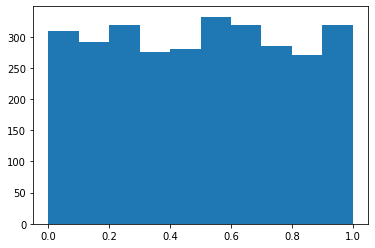

In [9]:
# true incoming rates
s1 = 1.0 #input_s1[1]
s2 = 0.1 #input_s2[1]
b = 2 # input_b[1]

# include time, even though rates = counts here, only included so that b_max_L doesn't have to be rewritten
t1 = 1300 #input_t1[1]
t2 = 4000 #input_t1[1]

times = np.array([t1, t2])

true_rates = np.array([s1, s2, b, b])
cluster_size = 2

# How many posterior samples
num_posterior_samples = 300
# How many predictive samples, equivalent to number of real data bins in real analysis
num_predictive_samples = 3000
# Bins in plot
num_bins = 10

# standard deviation of posterior
posterior_std = np.array([0.0, 0.0])
# samples of posterior
posterior_samples = np.random.normal(true_rates[:cluster_size], posterior_std, size=(num_posterior_samples, cluster_size))

# Each posterior sample is sampled into the predictive samples
posterior_predictive_source_counts = np.random.poisson(posterior_samples * times, (num_predictive_samples, num_posterior_samples, cluster_size))

# actual measured counts, available to use in analysis
measured_counts = np.random.poisson(true_rates * np.tile(times, 2), (num_predictive_samples, len(true_rates)))
measured_counts_combined = measured_counts[:,:cluster_size] + measured_counts[:,cluster_size:]

# maximum likelihood background
b_max_L = np.zeros((num_predictive_samples, num_posterior_samples))
for i in range(num_posterior_samples):
    for j in range(num_predictive_samples):
        b_max_L[j, i] = b_maxL_2(posterior_samples[i], times, measured_counts_combined[j])
# n, bins, _ = plt.hist(b_max_L.flatten(), bins=num_bins)
# x = bins
# y = normal_dist(bins, b, v[2,2,0,2,0])
# y = y * np.amax(n) / np.amax(y)
# plt.plot(x, y)

# print(np.var(b_max_L - b))
# print(v[2, 2, 0, 2, 0])


b_var = interpolate_matrix(
    np.array([b, s1, t1, s2, t2]),
    v[:,:,:,:,:,0,0,0],
    dimension_order,
    dimension_values,
    b_int_funcs
)
c_var = interpolate_matrix(
    np.array([b, s1, t1, s2, t2]),
    v[:,:,:,:,:,0,0,1],
    dimension_order,
    dimension_values,
    c_int_funcs
)
s_var = interpolate_matrix(
    np.array([b, s1, t1, s2, t2]),
    v[:,:,:,:,:,0,1,1],
    dimension_order,
    dimension_values,
    s_int_funcs
)

cov_mat = np.array(
    [[b_var, c_var],
     [c_var, s_var]]
)

print(v[1,1,1,1,1,0,:,:])
print(cov_mat)

posterior_predictive_counts = np.zeros((num_predictive_samples, num_posterior_samples))
for i in range(num_predictive_samples):
    for j in range(num_posterior_samples):
        counts = np.random.multivariate_normal([b_max_L[i, j]*t1, posterior_samples[j, 0]*t1], cov_mat)
        # print([b_max_L[i, j], posterior_samples[j, 0]])
        # print(v[0,0,0,0,0,0,:,:])
        # print(counts)
        # print()
        posterior_predictive_counts[i, j] = np.sum(counts)
        


# # Repeat for easier usage
# posterior_predictive_background_counts = np.repeat(b_max_L[:,:,np.newaxis], 2, axis=2)
# # Sample posterior predictive counts
# posterior_predictive_counts = np.random.poisson(posterior_predictive_background_counts + posterior_predictive_source_counts)
# Sort posterior predictive counts for each predictive sample, i.e. sort posterior samples
argsort = np.argsort(posterior_predictive_counts, axis=1)
total = np.take_along_axis(posterior_predictive_counts, argsort, axis=1)

# Find placement of measured counts in sorted array
cdf = np.zeros(num_predictive_samples)
for i in range(num_predictive_samples):
    cdf[i] = ((np.searchsorted(total[i,:], measured_counts_combined[i, 0], "left")
                     + np.searchsorted(total[i,:], measured_counts_combined[i, 0], "right"))
                     / (2 * num_posterior_samples))
    
_ = plt.hist(cdf, bins=num_bins)




In [41]:
v[:,:,:,:,:,0,0,1]

array([[[[[-2.99184945e+00, -1.45559906e+00, -5.65774728e-01],
          [-4.74124463e+00, -3.26535174e+00, -1.61919984e+00],
          [-5.92989102e+00, -5.79821415e+00, -5.41576510e+00]],

         [[-1.44110088e+01, -9.48681922e+00, -4.51116428e+00],
          [-1.75215393e+01, -1.50048907e+01, -1.03026446e+01],
          [-1.89396240e+01, -1.87415466e+01, -1.83930337e+01]],

         [[-5.45793807e+01, -4.55042621e+01, -2.99723910e+01],
          [-5.84315477e+01, -5.52180014e+01, -4.75108302e+01],
          [-6.00574630e+01, -5.98406123e+01, -5.92446527e+01]]],


        [[[-3.96487429e+01, -1.47232397e+01, -4.90911085e+00],
          [-9.49549183e+01, -4.54622089e+01, -1.73420217e+01],
          [-1.82620005e+02, -1.68311387e+02, -1.34529928e+02]],

         [[-2.73375154e+02, -1.25269424e+02, -4.57458858e+01],
          [-4.56033206e+02, -3.00671193e+02, -1.44045754e+02],
          [-5.92266419e+02, -5.75732274e+02, -5.30310502e+02]],

         [[-1.37707317e+03, -8.58552183e+02

In [42]:
temp_index = 1
s1 = input_s1[1]
s2 = input_s2[1]
b = input_b[1]

# include time, even though rates = counts here, only included so that b_max_L doesn't have to be rewritten
t1 = input_t1[1]
t2 = input_t1[1]

print(b)
print(input_b)
print(c_int_funcs)

c_var = interpolate_matrix(
    np.array([b, s1, t1, s2, t2])[:temp_index],
    v[:,:,:,:,:,0,0,1],
    dimension_order[:temp_index],
    dimension_values[:temp_index],
    c_int_funcs[:temp_index]
)
print(c_var)

3.1622776601683795
[  0.1          3.16227766 100.        ]
(CPUDispatcher(<function interpolate_logarithmic at 0x7f3c5f7171f0>), CPUDispatcher(<function interpolate_linear at 0x7f3c60aba3a0>), CPUDispatcher(<function interpolate_powerlaw at 0x7f3c5f79bc10>), CPUDispatcher(<function interpolate_linear at 0x7f3c60aba3a0>), CPUDispatcher(<function interpolate_logarithmic at 0x7f3c5f7171f0>))
0.1 3.1622776601683795 [[[[-2.99184945e+00 -1.45559906e+00 -5.65774728e-01]
   [-4.74124463e+00 -3.26535174e+00 -1.61919984e+00]
   [-5.92989102e+00 -5.79821415e+00 -5.41576510e+00]]

  [[-1.44110088e+01 -9.48681922e+00 -4.51116428e+00]
   [-1.75215393e+01 -1.50048907e+01 -1.03026446e+01]
   [-1.89396240e+01 -1.87415466e+01 -1.83930337e+01]]

  [[-5.45793807e+01 -4.55042621e+01 -2.99723910e+01]
   [-5.84315477e+01 -5.52180014e+01 -4.75108302e+01]
   [-6.00574630e+01 -5.98406123e+01 -5.92446527e+01]]]


 [[[-3.96487429e+01 -1.47232397e+01 -4.90911085e+00]
   [-9.49549183e+01 -4.54622089e+01 -1.7342021

In [6]:
input_b = np.geomspace(0.1,100,20)
input_s1 = np.geomspace(0.01,10,20)
input_t1 = np.geomspace(600, 6000, 20)
input_s2 = np.geomspace(0.01,10,20)
input_t2 = np.geomspace(600, 6000, 20)

In [81]:
# v_b = calc_bmaxL_variance_matrix(
#     np.array(input_b),
#     np.array([input_s1[10]]),
#     np.array([input_t1[10]]),
#     np.array([input_s2[5]]),
#     np.array([input_t2[6]])
# )
v_b = calc_bmaxL_variance_matrix(
    np.array(input_b),
    np.array([input_s1[19]]),
    np.array([input_t1[1]]),
    np.array([input_s2[3]]),
    np.array([input_t2[17]])
)

0 0 0 0 0
1 0 0 0 0
2 0 0 0 0
3 0 0 0 0
4 0 0 0 0
5 0 0 0 0
6 0 0 0 0
7 0 0 0 0
8 0 0 0 0
9 0 0 0 0
10 0 0 0 0
11 0 0 0 0
12 0 0 0 0
13 0 0 0 0
14 0 0 0 0
15 0 0 0 0
16 0 0 0 0
17 0 0 0 0
18 0 0 0 0
19 0 0 0 0


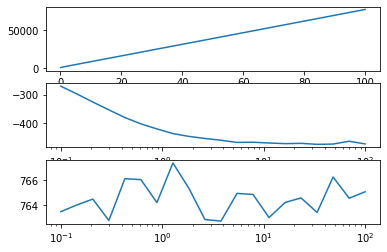

In [9]:
fig, ax = plt.subplots(nrows=3)
ax[0].plot(input_b, v_b[:,0,0,0,0,0,0,0])
ax[1].plot(input_b, v_b[:,0,0,0,0,0,1,0])
ax[2].plot(input_b, v_b[:,0,0,0,0,0,1,1])

# ax[0].set_xscale("log")
ax[1].set_xscale("log")
# ax[1].set_yscale("symlog")
ax[2].set_xscale("log")

In [87]:
v_s1 = calc_bmaxL_variance_matrix(
    np.array([input_b[12]]),
    np.array(input_s1),
    np.array([input_t1[10]]),
    np.array([input_s2[5]]),
    np.array([input_t2[6]])
)
# v_s1 = calc_bmaxL_variance_matrix(
#     np.array([input_b[1]]),
#     np.array(input_s1),
#     np.array([input_t1[19]]),
#     np.array([input_s2[3]]),
#     np.array([input_t2[14]])
# )

0 0 0 0 0
0 1 0 0 0
0 2 0 0 0
0 3 0 0 0
0 4 0 0 0
0 5 0 0 0
0 6 0 0 0
0 7 0 0 0
0 8 0 0 0
0 9 0 0 0
0 10 0 0 0
0 11 0 0 0
0 12 0 0 0
0 13 0 0 0
0 14 0 0 0
0 15 0 0 0
0 16 0 0 0
0 17 0 0 0
0 18 0 0 0
0 19 0 0 0


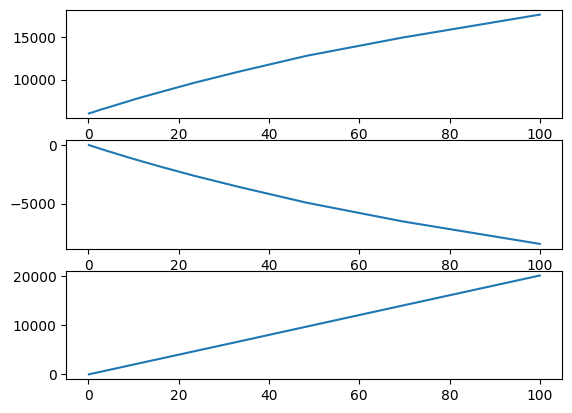

In [19]:
fig, ax = plt.subplots(nrows=3)
ax[0].plot(input_b, v_s1[0,:,0,0,0,0,0,0])
ax[1].plot(input_b, v_s1[0,:,0,0,0,0,1,0])
ax[2].plot(input_b, v_s1[0,:,0,0,0,0,1,1])

# ax[0].set_xscale("log")
# ax[1].set_xscale("log")
# ax[2].set_xscale("log")

In [13]:
v_t1 = calc_bmaxL_variance_matrix(
    np.array([input_b[12]]),
    np.array([input_s1[10]]),
    np.array(input_t1),
    np.array([input_s2[5]]),
    np.array([input_t2[6]])
)

0 0 0 0 0
0 0 1 0 0
0 0 2 0 0
0 0 3 0 0
0 0 4 0 0
0 0 5 0 0
0 0 6 0 0
0 0 7 0 0
0 0 8 0 0
0 0 9 0 0
0 0 10 0 0
0 0 11 0 0
0 0 12 0 0
0 0 13 0 0
0 0 14 0 0
0 0 15 0 0
0 0 16 0 0
0 0 17 0 0
0 0 18 0 0
0 0 19 0 0


[  -72.71497715   -87.47785155  -107.18855901  -132.8288327
  -160.79402009  -192.93133831  -234.5998191   -276.13602017
  -330.37774564  -395.56959924  -466.66583023  -548.63025169
  -647.31902831  -765.08643751  -891.95058139 -1038.24694435
 -1213.94356352 -1398.88072035 -1617.96861832 -1873.91489561]


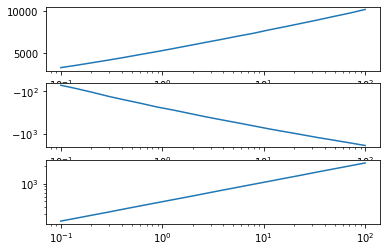

In [15]:
fig, ax = plt.subplots(nrows=3)
ax[0].plot(input_b, v_t1[0,0,:,0,0,0,0,0])
ax[1].plot(input_b, v_t1[0,0,:,0,0,0,1,0])
ax[2].plot(input_b, v_t1[0,0,:,0,0,0,1,1])

ax[0].set_xscale("log")
ax[1].set_xscale("log")
ax[1].set_yscale("symlog")
ax[1].set_ylim(1.1*np.amin(v_t1[0,0,:,0,0,0,1,0]), 0.9*np.amax(v_t1[0,0,:,0,0,0,1,0]))
ax[2].set_xscale("log")
ax[2].set_yscale("log")
print(v_t1[0,0,:,0,0,0,1,0])

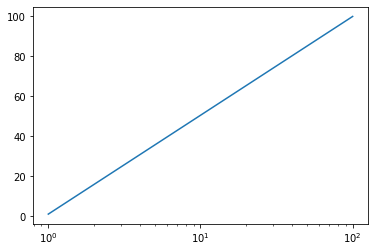

In [33]:
t_xs = np.geomspace(1,100,10)
t_ys = np.linspace(1,100,10)
plt.plot(t_xs, t_ys)
plt.xscale("log")

In [12]:
v_s2 = calc_bmaxL_variance_matrix(
    np.array([input_b[12]]),
    np.array([input_s1[10]]),
    np.array([input_t1[10]]),
    np.array(input_s2),
    np.array([input_t2[6]])
)

0 0 0 0 0
0 0 0 1 0
0 0 0 2 0
0 0 0 3 0
0 0 0 4 0
0 0 0 5 0
0 0 0 6 0
0 0 0 7 0
0 0 0 8 0
0 0 0 9 0
0 0 0 10 0
0 0 0 11 0
0 0 0 12 0
0 0 0 13 0
0 0 0 14 0
0 0 0 15 0
0 0 0 16 0
0 0 0 17 0
0 0 0 18 0
0 0 0 19 0


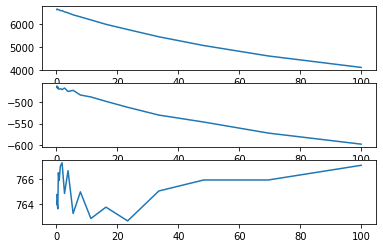

In [48]:
fig, ax = plt.subplots(nrows=3)
ax[0].plot(input_b, v_s2[0,0,0,:,0,0,0,0])
ax[1].plot(input_b, v_s2[0,0,0,:,0,0,1,0])
ax[2].plot(input_b, v_s2[0,0,0,:,0,0,1,1])

# ax[0].set_xscale("log")
# ax[0].set_yscale("log")
# ax[1].set_xscale("log")
# ax[2].set_xscale("log")

In [13]:
v_t2 = calc_bmaxL_variance_matrix(
    np.array([input_b[12]]),
    np.array([input_s1[10]]),
    np.array([input_t1[10]]),
    np.array([input_s2[5]]),
    np.array(input_t2)
)

0 0 0 0 0
0 0 0 0 1
0 0 0 0 2
0 0 0 0 3
0 0 0 0 4
0 0 0 0 5
0 0 0 0 6
0 0 0 0 7
0 0 0 0 8
0 0 0 0 9
0 0 0 0 10
0 0 0 0 11
0 0 0 0 12
0 0 0 0 13
0 0 0 0 14
0 0 0 0 15
0 0 0 0 16
0 0 0 0 17
0 0 0 0 18
0 0 0 0 19


[-582.62968196]


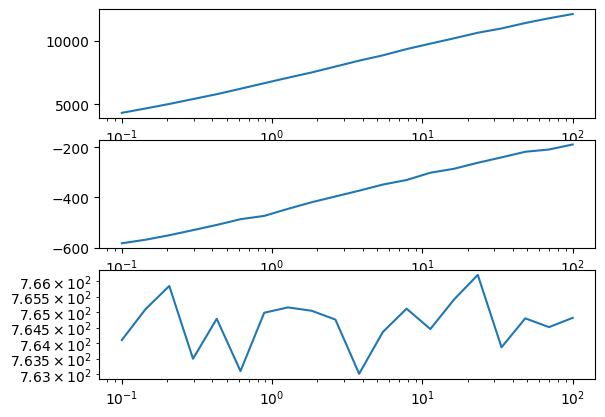

In [42]:
fig, ax = plt.subplots(nrows=3)
ax[0].plot(input_b, v_t2[0,0,0,0,:,0,0,0])
ax[1].plot(input_b, v_t2[0,0,0,0,:,0,1,0])
ax[2].plot(input_b, v_t2[0,0,0,0,:,0,1,1])

ax[0].set_xscale("log")
ax[1].set_xscale("log")
# ax[1].set_yscale("symlog")
# ax[1].set_ylim(1.1*np.amin(v_t2[0,0,:,0,0,0,1,0]), 0.9*np.amax(v_t2[0,0,:,0,0,0,1,0]))
ax[2].set_xscale("log")
ax[2].set_yscale("log")

In [16]:
# v_b = calc_bmaxL_variance_matrix(
#     np.array(input_b),
#     np.array([input_s1[10]]),
#     np.array([input_t1[10]]),
#     np.array([input_s2[10]]),
#     np.array([input_t2[10]])
# )

# v_s1 = calc_bmaxL_variance_matrix(
#     np.array([input_b[10]]),
#     np.array(input_s1),
#     np.array([input_t1[10]]),
#     np.array([input_s2[10]]),
#     np.array([input_t2[10]])
# )

# v_t1 = calc_bmaxL_variance_matrix(
#     np.array([input_b[10]]),
#     np.array([input_s1[10]]),
#     np.array(input_t1),
#     np.array([input_s2[10]]),
#     np.array([input_t2[10]])
# )

# v_s2 = calc_bmaxL_variance_matrix(
#     np.array([input_b[10]]),
#     np.array([input_s1[10]]),
#     np.array([input_t1[10]]),
#     np.array(input_s2),
#     np.array([input_t2[10]])
# )

# v_t2 = calc_bmaxL_variance_matrix(
#     np.array([input_b[10]]),
#     np.array([input_s1[10]]),
#     np.array([input_t1[10]]),
#     np.array([input_s2[10]]),
#     np.array(input_t2)
# )

# v_b = calc_bmaxL_variance_matrix(
#     np.array(input_b),
#     np.array([input_s1[19]]),
#     np.array([input_t1[1]]),
#     np.array([input_s2[2]]),
#     np.array([input_t2[18]])
# )

# v_s1 = calc_bmaxL_variance_matrix(
#     np.array([input_b[1]]),
#     np.array(input_s1),
#     np.array([input_t1[1]]),
#     np.array([input_s2[2]]),
#     np.array([input_t2[18]])
# )

# v_t1 = calc_bmaxL_variance_matrix(
#     np.array([input_b[1]]),
#     np.array([input_s1[19]]),
#     np.array(input_t1),
#     np.array([input_s2[2]]),
#     np.array([input_t2[18]])
# )

# v_s2 = calc_bmaxL_variance_matrix(
#     np.array([input_b[1]]),
#     np.array([input_s1[19]]),
#     np.array([input_t1[1]]),
#     np.array(input_s2),
#     np.array([input_t2[18]])
# )

# v_t2 = calc_bmaxL_variance_matrix(
#     np.array([input_b[1]]),
#     np.array([input_s1[19]]),
#     np.array([input_t1[1]]),
#     np.array([input_s2[2]]),
#     np.array(input_t2)
# )


v_b = calc_bmaxL_variance_matrix(
    np.array(input_b),
    np.array([input_s1[2]]),
    np.array([input_t1[18]]),
    np.array([input_s2[1]]),
    np.array([input_t2[19]])
)

v_s1 = calc_bmaxL_variance_matrix(
    np.array([input_b[1]]),
    np.array(input_s1),
    np.array([input_t1[18]]),
    np.array([input_s2[1]]),
    np.array([input_t2[19]])
)

v_t1 = calc_bmaxL_variance_matrix(
    np.array([input_b[1]]),
    np.array([input_s1[2]]),
    np.array(input_t1),
    np.array([input_s2[1]]),
    np.array([input_t2[19]])
)

v_s2 = calc_bmaxL_variance_matrix(
    np.array([input_b[1]]),
    np.array([input_s1[2]]),
    np.array([input_t1[18]]),
    np.array(input_s2),
    np.array([input_t2[19]])
)

v_t2 = calc_bmaxL_variance_matrix(
    np.array([input_b[1]]),
    np.array([input_s1[2]]),
    np.array([input_t1[18]]),
    np.array([input_s2[1]]),
    np.array(input_t2)
)

0 0 0 0 0
1 0 0 0 0
2 0 0 0 0
3 0 0 0 0
4 0 0 0 0
5 0 0 0 0
6 0 0 0 0
7 0 0 0 0
8 0 0 0 0
9 0 0 0 0
10 0 0 0 0
11 0 0 0 0
12 0 0 0 0
13 0 0 0 0
14 0 0 0 0
15 0 0 0 0
16 0 0 0 0
17 0 0 0 0
18 0 0 0 0
19 0 0 0 0
0 0 0 0 0
0 1 0 0 0
0 2 0 0 0
0 3 0 0 0
0 4 0 0 0
0 5 0 0 0
0 6 0 0 0
0 7 0 0 0
0 8 0 0 0
0 9 0 0 0
0 10 0 0 0
0 11 0 0 0
0 12 0 0 0
0 13 0 0 0
0 14 0 0 0
0 15 0 0 0
0 16 0 0 0
0 17 0 0 0
0 18 0 0 0
0 19 0 0 0
0 0 0 0 0
0 0 1 0 0
0 0 2 0 0
0 0 3 0 0
0 0 4 0 0
0 0 5 0 0
0 0 6 0 0
0 0 7 0 0
0 0 8 0 0
0 0 9 0 0
0 0 10 0 0
0 0 11 0 0
0 0 12 0 0
0 0 13 0 0
0 0 14 0 0
0 0 15 0 0
0 0 16 0 0
0 0 17 0 0
0 0 18 0 0
0 0 19 0 0
0 0 0 0 0
0 0 0 1 0
0 0 0 2 0
0 0 0 3 0
0 0 0 4 0
0 0 0 5 0
0 0 0 6 0
0 0 0 7 0
0 0 0 8 0
0 0 0 9 0
0 0 0 10 0
0 0 0 11 0
0 0 0 12 0
0 0 0 13 0
0 0 0 14 0
0 0 0 15 0
0 0 0 16 0
0 0 0 17 0
0 0 0 18 0
0 0 0 19 0
0 0 0 0 0
0 0 0 0 1
0 0 0 0 2
0 0 0 0 3
0 0 0 0 4
0 0 0 0 5
0 0 0 0 6
0 0 0 0 7
0 0 0 0 8
0 0 0 0 9
0 0 0 0 10
0 0 0 0 11
0 0 0 0 12
0 0 0 0 13
0 0 0 0 14
0 0 0

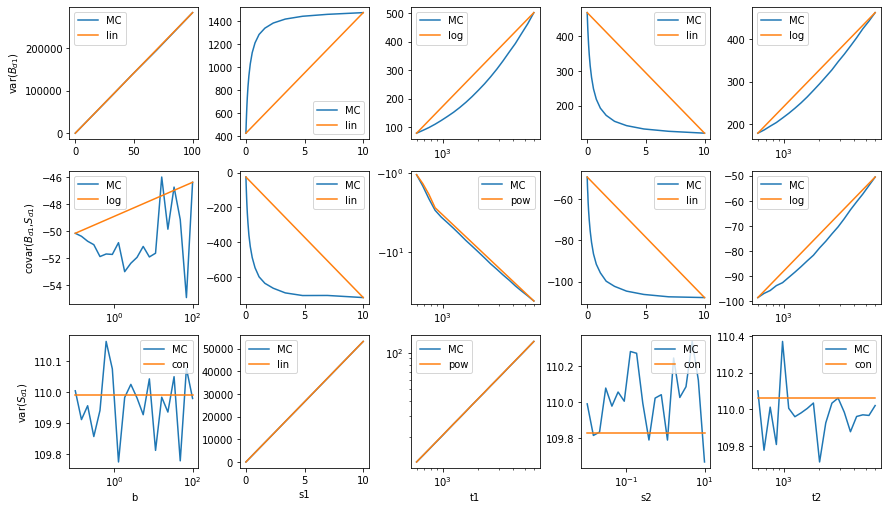

In [17]:
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(12,7))
fig.tight_layout()

v_mats = (v_b, v_s1, v_t1, v_s2, v_t2)
xs = (input_b, input_s1, input_t1, input_s2, input_t2)
v_indices = ((0,0), (0,1), (1,1))

b_int_funcs = (interpolate_linear, interpolate_linear, interpolate_logarithmic, interpolate_linear, interpolate_logarithmic)
c_int_funcs = (interpolate_logarithmic, interpolate_linear, interpolate_powerlaw, interpolate_linear, interpolate_logarithmic)
s_int_funcs = (interpolate_constant, interpolate_linear, interpolate_powerlaw, interpolate_constant, interpolate_constant)

int_funcs = (b_int_funcs, c_int_funcs, s_int_funcs)

axis_scales = (
    (("linear", "linear"), ("linear", "linear"), ("log", "linear"), ("linear", "linear"), ("log", "linear")),
    (("log", "linear"), ("linear", "linear"), ("log", "symlog"), ("linear", "linear"), ("log", "linear")),
    (("log", "linear"), ("linear", "linear"), ("log", "log"), ("log", "linear"), ("log", "linear"))
)

x_labels = ("b", "s1", "t1", "s2", "t2")
y_labels = ("var($B_{d1}$)", "covar($B_{d1}$,$S_{d1}$)", "var($S_{d1}$)")

labels = (
    (("lin"), ("lin"), ("log"), ("lin"), ("log")),
    (("log"), ("lin"), ("pow"), ("lin"), ("log")),
    (("con"), ("lin"), ("pow"), ("con"), ("con")),
)

for row in range(len(axes)):
    for col in range(len(axes[0])):
        x = xs[col]
        y = v_mats[col][:,:,:,:,:,0,v_indices[row][0],v_indices[row][1]].flatten()
        int_func = int_funcs[row][col]
        axes[row,col].plot(x, y, label="MC")
        y2 = int_func(x[0], x[-1], y[0], y[-1], x)
        axes[row,col].plot(x, y2, label=labels[row][col])
        
        axes[row,col].legend()
        
        axes[row,col].set_xscale(axis_scales[row][col][0])
        axes[row,col].set_yscale(axis_scales[row][col][1])
        
        if row==1 and col==2:
            axes[row,col].set_ylim(1.1*np.amin(y), 0.9*np.amax(y))
            
        if col==0:
            axes[row,col].set_ylabel(y_labels[row])
            
        if row==2:
            axes[row,col].set_xlabel(x_labels[col])
            
plt.savefig("PPC_scaling_different2.pdf", bbox_inches='tight')